# SNN_0

This code is designed to demo the use of a Spiking Neural Network to propogate spikes between neurons. At this stage there is no learning involved, it's purely about propogating spikes between LIF neurons.

More biologically plausible neurons and learning will be introduced later.

### Set up the environment

In [2]:
import numpy as np
from mnist import MNIST   
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
duration = 50        # Length of each time period (ms)

### Utility functions

In [4]:
def plot_spikes(time, Vm, neuron_id):
    plt.plot(time,Vm)
    plt.title('Leaky Integrate and Fire @ {}'.format(neuron_id))
    plt.ylabel('Membrane potential (V)')
    plt.xlabel('Time (msec)')
    plt.ylim([0,2])
    plt.show()

### Create a basic neuron class

Use LIF neuron for now, this can be made more complex over time.

Based on http://neurdon.wpengine.com/2011/01/19/neural-modeling-with-python-part-1/

In [5]:
class Neuron():
    def __init__(self):
        # Simulation config (may not all be needed!!)
        self.T        = 50          # total time to sumulate (msec)
        self.dt       = 0.125       # simulation time step
        #self.time     = np.arange(0, T+dt, dt) # Time array
        self.t_rest   = 0           # initial refractory time
        
        #LIF Properties 
        #self.Vm       = np.zeros(len(time)) # potential (V) trace over time
        self.Vm       = 0                # Initial potential (mV)
        self.t        = 0                # Neuron time step
        self.Rm       = 1                # Resistance (kOhm)
        self.Cm       = 10               # Capacitance (uF)
        self.tau_m    = self.Rm * self.Cm # Time constant
        self.tau_ref  = 4                # refractory period (ms)
        self.Vth      = 0.75             # = 1  #spike threshold
        self.V_spike  = 0.5              # spike delta (V)
    
    def spike_generator(self, input, duration):
        time = np.arange(self.t, self.t+duration+self.dt, self.dt)
        Vm = np.zeros(len(time)) # potential (V) trace over time
        Vm[-1] = self.Vm   # Vm[0] doesn't work due to the equation below starting with [i-1] when i=0
        print ('Neuron.spike_generator.initial_state(input={}, duration={}, Vm={}, t={})'
               .format(input, duration, self.Vm, self.t))
        for i,t in enumerate(time):
            if t > self.t_rest:
                Vm[i] = Vm[i-1] + (-Vm[i-1] + input*self.Rm) / self.tau_m * self.dt
                if Vm[i] >= self.Vth:
                    Vm[i] += self.V_spike
                    self.t_rest = t + self.tau_ref
                    #print ('*** Neuron.spike_generator.spike=(self.t_rest={}, t={}, self.tau_ref={})'
                    #       .format(self.t_rest, t, self.tau_ref))

            # Save state
            self.Vm = Vm[i]
            self.t += self.dt
        print ('Neuron.spike_generator.exit_state(Vm={} at iteration i={}, time={})'.format(self.Vm, i, self.t))
        return time, Vm

In [24]:
neuron = Neuron()

In [25]:
neuron_time = np.zeros(1)
neuron_Vm = np.zeros(1)
for time_step in range (5):
    t, v = neuron.spike_generator(.9, duration=25)
    #print(t)
    neuron_time = np.append(neuron_time,t)
    #print(neuron_time)
    neuron_Vm = np.append(neuron_Vm,v)

Neuron.spike_generator.initial_state(input=0.9, duration=25, Vm=0, t=0)
Neuron.spike_generator.exit_state(Vm=0.24284151927680617 at iteration i=200, time=25.125)
Neuron.spike_generator.initial_state(input=0.9, duration=25, Vm=0.24284151927680617, t=25.125)
Neuron.spike_generator.exit_state(Vm=0.4261566078593488 at iteration i=200, time=50.25)
Neuron.spike_generator.initial_state(input=0.9, duration=25, Vm=0.4261566078593488, t=50.25)
Neuron.spike_generator.exit_state(Vm=0.5583357487401372 at iteration i=200, time=75.375)
Neuron.spike_generator.initial_state(input=0.9, duration=25, Vm=0.5583357487401372, t=75.375)
Neuron.spike_generator.exit_state(Vm=0.6536433713645365 at iteration i=200, time=100.5)
Neuron.spike_generator.initial_state(input=0.9, duration=25, Vm=0.6536433713645365, t=100.5)
Neuron.spike_generator.exit_state(Vm=0.7223648267302311 at iteration i=200, time=125.625)


In [26]:
print(neuron_time)

[  0.00000000e+00   0.00000000e+00   1.25000000e-01 ...,   1.25250000e+02
   1.25375000e+02   1.25500000e+02]


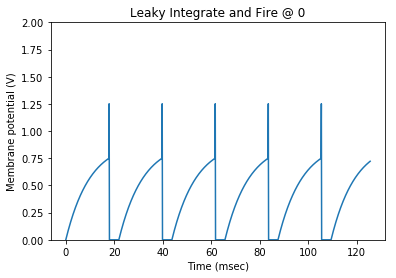

In [27]:
plot_spikes(neuron_time, neuron_Vm, neuron_id = "0")